# Stromerzeugung in Deutschland in 2024

### Vorgehen:

1. Hypothesen aufstellen
   1. Am Tag gibt es mehr Sonnenenergie als Nachts
   2. Solar erzeugt viel Strom, wenn Wind wenig Strom erzeugt
   3. Die Zeitumstellung hat einen Einfluss auf die Energieerzeugung (Zusatz)
   4. Im Jahr liefern die erneuerbaren Energien mehr Strom als die konventionellen Energien
   5. Die Energieerzeugung durch Müll ist die meiste Zeit konstant
   6. Kohle und Gas werden vor allem dann benötigt, wenn man eine hohe Last hat
   7. Wenn viel Energie aus erneuerbaren Energiequellen gewonnen wird, wird weniger Energie konventionell gewonnen
   8. In den Dämmerungen wird mehr Windstrom produziert, als in der Mittags- und Mitternachts-zeit (Zusatz)
   9. Weitere
2. Hypothesen nacheinander prüfen

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
energy_data = pd.read_csv("./data/energy_chart_Deutschland_2024.csv", encoding='latin1', sep=',')

energy_data = energy_data[1:]

for category in energy_data.keys()[1:]:
    energy_data[category] = energy_data[category].astype('float')
energy_data['Datum (MEZ)'] = pd.to_datetime(energy_data['Datum (MEZ)'], utc=True) + pd.DateOffset(hours=1)

In [4]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30562 entries, 1 to 30562
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Datum (MEZ)     30562 non-null  datetime64[ns, UTC]
 1   Laufwasser      30562 non-null  float64            
 2   Biomasse        30562 non-null  float64            
 3   Braunkohle      30562 non-null  float64            
 4   Steinkohle      30562 non-null  float64            
 5   Öl              30562 non-null  float64            
 6   Erdgas          30562 non-null  float64            
 7   Geothermie      30482 non-null  float64            
 8   Speicherwasser  30562 non-null  float64            
 9   Pumpspeicher    30562 non-null  float64            
 10  Andere          30474 non-null  float64            
 11  Müll            30562 non-null  float64            
 12  Wind Offshore   30562 non-null  float64            
 13  Wind Onshore    30562 non-null 

In [5]:
energy_data.describe()

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
count,30562.000000,30562.000000,30562.000000,30562.000000,30562.000000,30562.000000,30482.000000,30562.000000,30562.000000,30474.000000,30562.000000,30562.000000,30562.000000,30562.000000,30561.000000
mean,2426.938564,4158.563864,7926.534828,2622.557922,370.715846,5209.983172,17.625254,142.407774,1266.177217,159.679153,1052.003187,2827.030826,11665.830207,7774.229281,52234.339514
std,314.757939,326.918942,3248.433067,1849.452298,90.279029,2793.181931,3.732722,131.476631,1667.198180,49.238767,168.749259,1884.404468,9254.845105,11162.603360,9141.370843
min,1154.000000,3302.200000,2501.800000,231.600000,37.000000,1330.800000,5.700000,1.100000,0.000000,111.100000,354.500000,0.000000,44.200000,0.000000,31900.800000
25%,2191.400000,3926.500000,4986.025000,1224.425000,333.500000,2952.750000,15.400000,46.200000,96.400000,113.500000,945.900000,1143.325000,4581.150000,2.000000,44632.700000
50%,2423.450000,4179.400000,8023.150000,2059.750000,367.800000,4574.750000,16.400000,93.200000,416.900000,148.400000,1092.700000,2618.500000,9171.950000,482.250000,52135.200000
75%,2668.300000,4392.000000,10471.350000,3619.800000,377.475000,6743.675000,21.100000,194.700000,1904.525000,189.800000,1172.675000,4378.950000,16434.300000,13713.275000,59466.000000
max,3180.300000,5013.700000,17158.300000,10022.000000,1191.100000,15355.000000,25.900000,680.800000,7445.200000,324.800000,1366.600000,7389.300000,45941.000000,46942.000000,75766.700000


<Axes: >

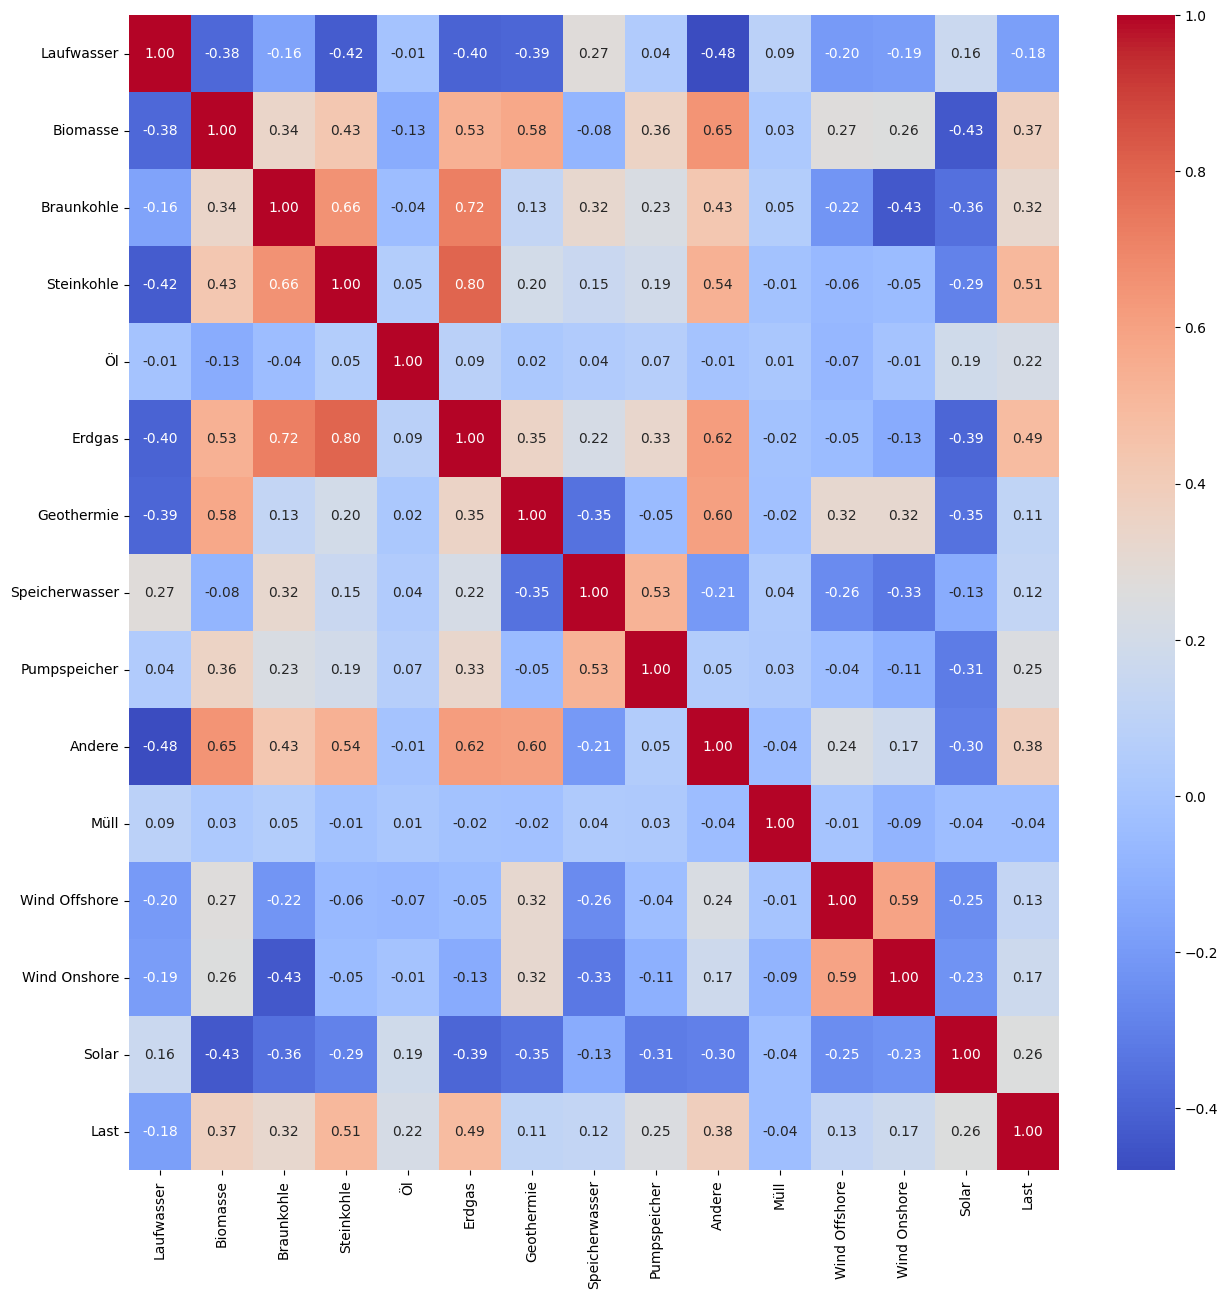

In [6]:
energy_data_num = energy_data.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(energy_data_num, cmap="coolwarm", annot=True, fmt="0.2f")

# Resampling des Dataframes von 15min abschnitten auf Wochen um erstmal eine grobe Übersicht zu bekommen

In [7]:
energy_data = energy_data.set_index("Datum (MEZ)")
energy_data.head(5)

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
Datum (MEZ),,,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
2024-01-01 00:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2024-01-01 00:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
2024-01-01 00:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
2024-01-01 01:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8


In [8]:
weekly_mean_df = energy_data.resample("W").mean()
weekly_min_df = energy_data.resample("W").min()
weekly_max_df = energy_data.resample("W").max()

In [9]:
weekly_df = energy_data.resample('W').agg(['mean', 'min', 'max'])
weekly_df.columns = ['_'.join(col).strip() for col in weekly_df.columns]
weekly_df.head(5)

,Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,Steinkohle_mean,...,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max
Datum (MEZ),,,,,,,,,,,,,,,,,,,,,
2024-01-07 00:00:00+00:00,2191.699405,1154.0,2424.0,4373.359821,4083.4,4726.9,7360.295982,3295.9,12410.6,2332.676190,...,6437.3,22380.229613,5672.8,42850.5,936.530506,1.5,7923.0,52811.657440,36592.6,65872.4
2024-01-14 00:00:00+00:00,2293.784821,2004.4,2487.9,4481.776339,4189.8,4825.7,12631.270387,6808.2,15789.4,6895.946280,...,6564.9,12257.950893,2036.3,28538.3,1857.787202,1.4,15615.5,61640.776042,45332.1,72802.6
2024-01-21 00:00:00+00:00,2167.367411,1916.1,2422.7,4477.871726,4189.8,4818.4,11236.998958,3626.8,15975.5,5479.241369,...,6513.3,19597.047768,3430.2,38212.4,1335.627530,1.5,12536.1,62999.312351,46390.6,75766.7
2024-01-28 00:00:00+00:00,2376.558780,1850.8,2685.1,4429.521577,4096.4,4780.6,5072.276935,3290.9,8605.9,3665.138839,...,6245.3,29218.077827,7325.7,44391.0,2683.066369,1.6,25493.2,59078.982292,40008.5,73104.2
2024-02-04 00:00:00+00:00,2354.463988,2124.6,2501.7,4457.281399,4149.5,4818.5,6716.299107,3368.6,10843.2,3824.050595,...,6806.6,26043.531994,5218.5,40746.7,2542.674107,1.1,23217.3,58763.772024,43247.5,72138.6


### Solarstromerzeugung min, mean und max wöchentlich

In [10]:
px.line(weekly_df, y=["Solar_mean", "Solar_min", "Solar_max"], labels={"value": "Stromproduktion in MW"})

In [11]:
hourly_df = energy_data.resample("h").agg(["mean", "min", "max"])
hourly_df.columns = ['_'.join(col).strip() for col in hourly_df.columns]
hourly_df = hourly_df.reset_index()
hourly_df.head(5)

,Datum (MEZ),Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,...,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max
0,2024-01-01 00:00:00+00:00,2220.225,2216.7,2223.2,4184.150,4180.6,4187.7,3352.500,3314.0,3436.9,...,5838.9,29217.925,29028.0,29440.9,2.025,1.6,2.4,40170.100,39615.0,40592.6
1,2024-01-01 01:00:00+00:00,2218.450,2216.1,2222.0,4157.200,4148.6,4166.3,3333.575,3322.8,3348.9,...,5463.9,29335.150,29110.8,29501.6,1.875,1.7,2.4,38818.125,38328.8,39336.8
2,2024-01-01 02:00:00+00:00,2229.175,2223.6,2232.8,4142.925,4136.7,4153.2,3334.550,3330.2,3342.1,...,5360.1,29316.350,29271.8,29388.6,1.825,1.6,2.4,37847.550,37285.7,38408.0
3,2024-01-01 03:00:00+00:00,2224.950,2220.8,2228.8,4120.125,4116.6,4126.4,3353.625,3342.6,3365.8,...,4763.0,28860.025,28673.7,29150.7,1.975,1.6,2.4,37123.225,37031.1,37307.9
4,2024-01-01 04:00:00+00:00,2212.475,2210.2,2215.7,4124.925,4118.9,4133.6,3354.325,3352.2,3357.5,...,4579.0,28953.975,28736.3,29213.9,1.625,1.6,1.7,36753.525,36612.8,36984.6


In [12]:
june_df = hourly_df[hourly_df["Datum (MEZ)"].dt.month == 6]

px.line(june_df, y=["Solar_mean"], x="Datum (MEZ)", title="Solarstromerzeugung im Juni", labels={"value": "Stromproduktion in MW"})


In [13]:
hourly_df["Stunden"] = hourly_df["Datum (MEZ)"].dt.hour
hourly_solar_df = hourly_df.groupby("Stunden")["Solar_mean"].mean()
px.line(hourly_solar_df)

In [14]:
hourly_index = hourly_df.set_index("Datum (MEZ)")
hourly_mean_df = hourly_index.groupby("Stunden").mean()
hourly_solar_wind_mean_df = hourly_mean_df[["Wind Onshore_mean", "Wind Offshore_mean"]]
px.line(hourly_solar_wind_mean_df, y=["Wind Onshore_mean", "Wind Offshore_mean"])

# 2. Solar erzeugt viel Strom, wenn Wind wenig Strom erzeugt

In [15]:
wind_df = hourly_df[["Datum (MEZ)" ,"Wind Offshore_mean", "Wind Offshore_min", "Wind Offshore_max", "Wind Onshore_mean", "Wind Onshore_min", "Wind Onshore_max"]]
wind_df.head(5)

,Datum (MEZ),Wind Offshore_mean,Wind Offshore_min,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max
0,2024-01-01 00:00:00+00:00,5679.225,5512.0,5838.9,29217.925,29028.0,29440.9
1,2024-01-01 01:00:00+00:00,5345.725,5282.2,5463.9,29335.150,29110.8,29501.6
2,2024-01-01 02:00:00+00:00,5188.575,4864.3,5360.1,29316.350,29271.8,29388.6
3,2024-01-01 03:00:00+00:00,4674.100,4582.5,4763.0,28860.025,28673.7,29150.7
4,2024-01-01 04:00:00+00:00,4439.350,4350.2,4579.0,28953.975,28736.3,29213.9


In [16]:
solar_df = hourly_df[["Datum (MEZ)", "Solar_mean", "Solar_min", "Solar_max"]]
solar_df.head(5)

,Datum (MEZ),Solar_mean,Solar_min,Solar_max
0,2024-01-01 00:00:00+00:00,2.025,1.6,2.4
1,2024-01-01 01:00:00+00:00,1.875,1.7,2.4
2,2024-01-01 02:00:00+00:00,1.825,1.6,2.4
3,2024-01-01 03:00:00+00:00,1.975,1.6,2.4
4,2024-01-01 04:00:00+00:00,1.625,1.6,1.7


### Plot für das Ganze Jahr mit vergleich von Wind zu Solar

/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_33352/2384909165.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



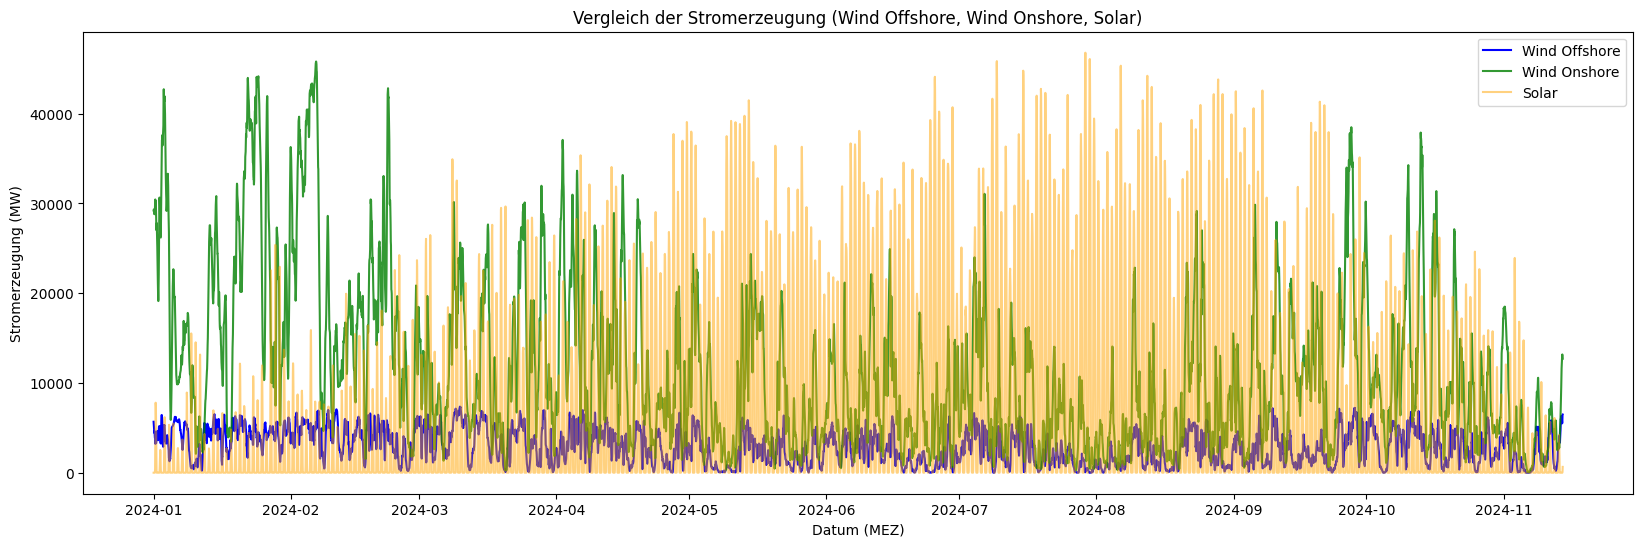

In [17]:
wind_combined_mean_df = wind_df
wind_combined_mean_df["On_and_Offshore_wind_mean"] = wind_combined_mean_df["Wind Offshore_mean"] + wind_combined_mean_df["Wind Onshore_mean"]

plt.figure(figsize=(20, 6))

sns.lineplot(data=wind_df, x="Datum (MEZ)", y="Wind Offshore_mean", color="blue", alpha=1, label="Wind Offshore")

sns.lineplot(data=wind_df, x="Datum (MEZ)", y="Wind Onshore_mean", color="green", alpha=0.8, label="Wind Onshore")

sns.lineplot(data=solar_df, x="Datum (MEZ)", y="Solar_mean", color="orange", alpha=0.5, label="Solar")

plt.title("Vergleich der Stromerzeugung (Wind Offshore, Wind Onshore, Solar)")
plt.xlabel("Datum (MEZ)")
plt.ylabel("Stromerzeugung (MW)")

plt.legend()

plt.show()


### Berechnung der Korrelation

In [18]:
corr_wind_solar = solar_df["Solar_mean"].corr(wind_combined_mean_df["On_and_Offshore_wind_mean"])
print(corr_wind_solar)

-0.2449161209768763


### Plot für das Januar mit vergleich von Wind zu Solar

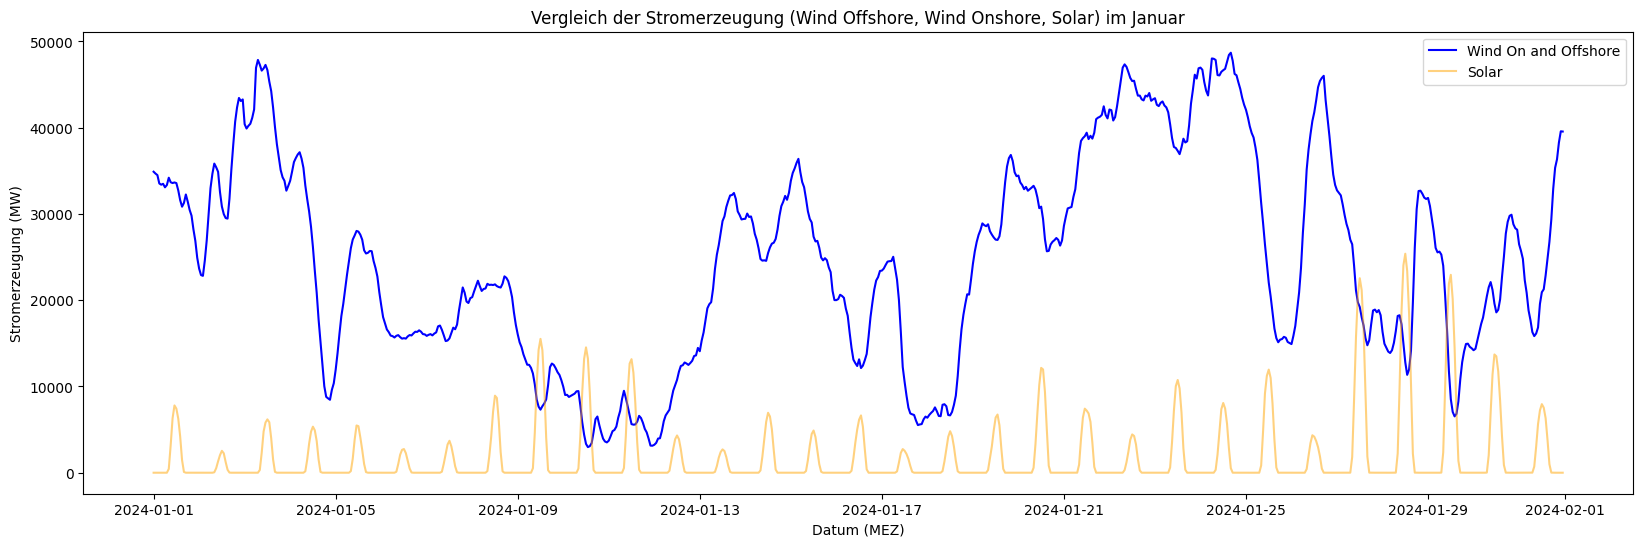

In [19]:
wind_jan_df = wind_combined_mean_df[wind_combined_mean_df["Datum (MEZ)"].dt.month==1]
solar_jan_df = solar_df[solar_df["Datum (MEZ)"].dt.month==1]

plt.figure(figsize=(20, 6))

sns.lineplot(data=wind_jan_df, x="Datum (MEZ)", y="On_and_Offshore_wind_mean", color="blue", alpha=1, label="Wind On and Offshore")

sns.lineplot(data=solar_jan_df, x="Datum (MEZ)", y="Solar_mean", color="orange", alpha=0.5, label="Solar")

plt.title("Vergleich der Stromerzeugung (Wind Offshore, Wind Onshore, Solar) im Januar")
plt.xlabel("Datum (MEZ)")
plt.ylabel("Stromerzeugung (MW)")

plt.legend()

plt.show()

### Berechnung der Differenz im Jahr stündlich

In [20]:
df_solar_wind_hourly = wind_combined_mean_df.merge(solar_df)
df_solar_wind_hourly["differenz_solar_wind"] = df_solar_wind_hourly["On_and_Offshore_wind_mean"] - df_solar_wind_hourly["Solar_mean"]
df_solar_wind_hourly

,Datum (MEZ),Wind Offshore_mean,Wind Offshore_min,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,On_and_Offshore_wind_mean,Solar_mean,Solar_min,Solar_max,differenz_solar_wind
0,2024-01-01 00:00:00+00:00,5679.225,5512.0,5838.9,29217.925,29028.0,29440.9,34897.150,2.025,1.6,2.4,34895.125
1,2024-01-01 01:00:00+00:00,5345.725,5282.2,5463.9,29335.150,29110.8,29501.6,34680.875,1.875,1.7,2.4,34679.000
2,2024-01-01 02:00:00+00:00,5188.575,4864.3,5360.1,29316.350,29271.8,29388.6,34504.925,1.825,1.6,2.4,34503.100
3,2024-01-01 03:00:00+00:00,4674.100,4582.5,4763.0,28860.025,28673.7,29150.7,33534.125,1.975,1.6,2.4,33532.150
4,2024-01-01 04:00:00+00:00,4439.350,4350.2,4579.0,28953.975,28736.3,29213.9,33393.325,1.625,1.6,1.7,33391.700
...,...,...,...,...,...,...,...,...,...,...,...,...
7636,2024-11-14 04:00:00+00:00,5860.900,5815.1,5910.1,12794.250,12564.7,13006.8,18655.150,0.000,0.0,0.0,18655.150
7637,2024-11-14 05:00:00+00:00,5500.975,5341.1,5585.9,13017.375,12967.0,13057.9,18518.350,0.000,0.0,0.0,18518.350
7638,2024-11-14 06:00:00+00:00,5616.750,5470.6,5751.2,13177.500,13044.5,13258.3,18794.250,0.000,0.0,0.0,18794.250
7639,2024-11-14 07:00:00+00:00,6414.100,6211.4,6627.0,12900.525,12789.0,12961.5,19314.625,90.475,1.7,234.0,19224.150


<Axes: xlabel='Datum (MEZ)', ylabel='differenz_solar_wind'>

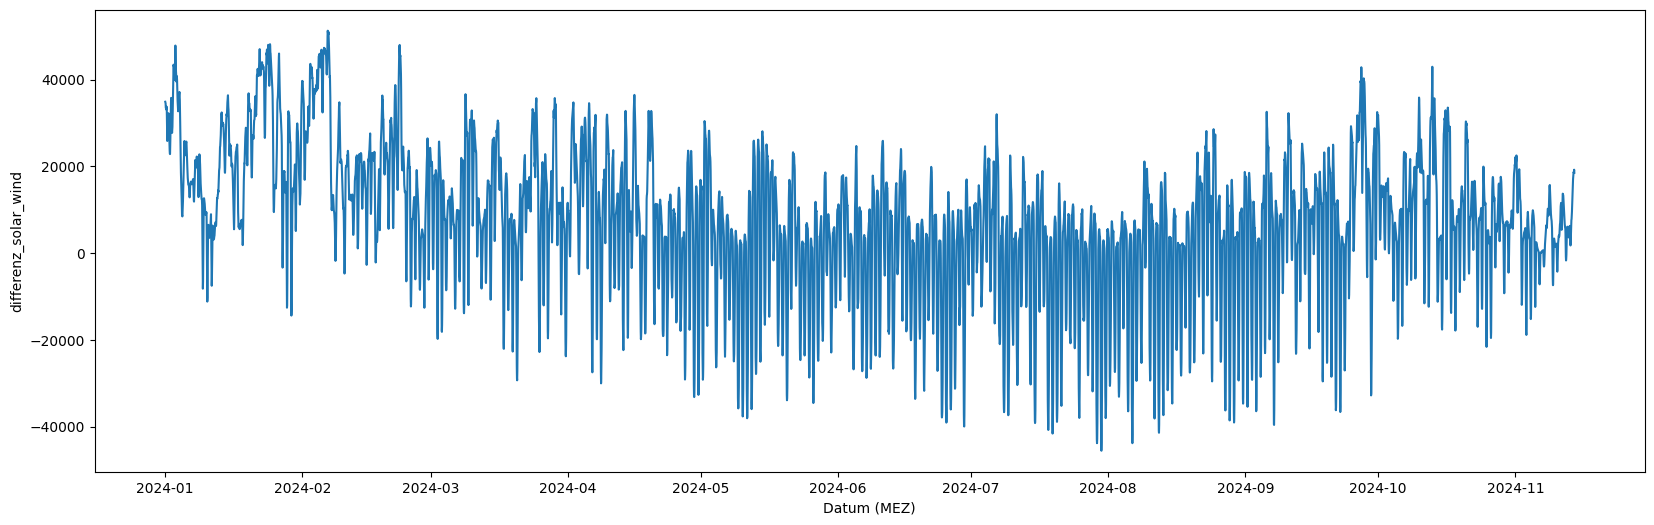

In [21]:
plt.figure(figsize=(20, 6))
sns.lineplot(df_solar_wind_hourly, x="Datum (MEZ)", y="differenz_solar_wind")

### Hier ist aufgrund der aufschlüsselung in Stunden schlecht zu erkennen wie der genauere Trend ist, also müsste man dies in wöchentlich oder monatlich probieren.

In [22]:
monthly_df = energy_data.resample("ME").agg(["mean", "min", "max"])
monthly_df.columns = ['_'.join(col).strip() for col in monthly_df.columns]
monthly_df["Wind_gesamt_mean"] = monthly_df["Wind Offshore_mean"] + monthly_df["Wind Onshore_mean"]

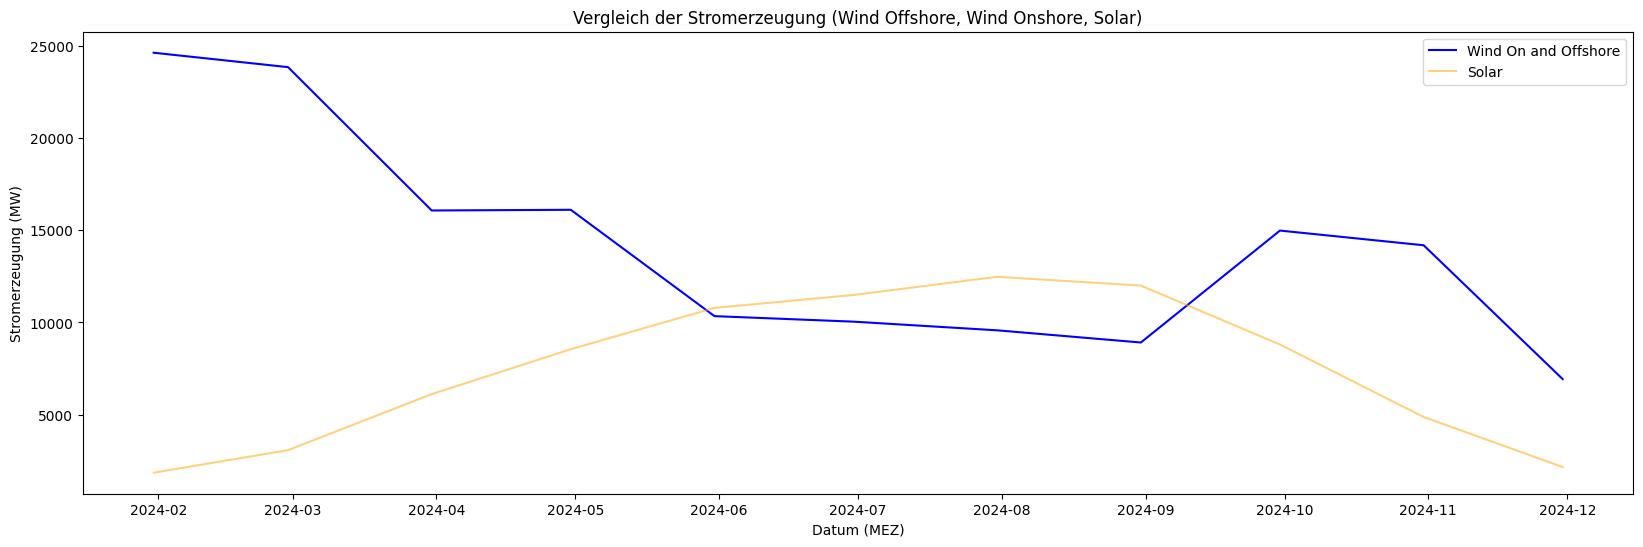

In [23]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=monthly_df, x="Datum (MEZ)", y="Wind_gesamt_mean", color="blue", alpha=1, label="Wind On and Offshore")

sns.lineplot(data=monthly_df, x="Datum (MEZ)", y="Solar_mean", color="orange", alpha=0.5, label="Solar")

plt.title("Vergleich der Stromerzeugung (Wind Offshore, Wind Onshore, Solar)")
plt.xlabel("Datum (MEZ)")
plt.ylabel("Stromerzeugung (MW)")

plt.legend()

plt.show()

## Im Jahr liefern die erneuerbaren Energien mehr Strom als die konventionellen Energien

In [24]:
renewable_energy_list = ["Laufwasser_mean", "Biomasse_mean", "Geothermie_mean", "Speicherwasser_mean", "Pumpspeicher_mean", "Wind Offshore_mean", "Wind Onshore_mean", "Solar_mean"]
fossil_energy_list = ["Braunkohle_mean", "Steinkohle_mean", "Öl_mean", "Erdgas_mean", "Andere_mean", "Müll_mean"]
weekly_df.head(5)

,Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,Steinkohle_mean,...,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max
Datum (MEZ),,,,,,,,,,,,,,,,,,,,,
2024-01-07 00:00:00+00:00,2191.699405,1154.0,2424.0,4373.359821,4083.4,4726.9,7360.295982,3295.9,12410.6,2332.676190,...,6437.3,22380.229613,5672.8,42850.5,936.530506,1.5,7923.0,52811.657440,36592.6,65872.4
2024-01-14 00:00:00+00:00,2293.784821,2004.4,2487.9,4481.776339,4189.8,4825.7,12631.270387,6808.2,15789.4,6895.946280,...,6564.9,12257.950893,2036.3,28538.3,1857.787202,1.4,15615.5,61640.776042,45332.1,72802.6
2024-01-21 00:00:00+00:00,2167.367411,1916.1,2422.7,4477.871726,4189.8,4818.4,11236.998958,3626.8,15975.5,5479.241369,...,6513.3,19597.047768,3430.2,38212.4,1335.627530,1.5,12536.1,62999.312351,46390.6,75766.7
2024-01-28 00:00:00+00:00,2376.558780,1850.8,2685.1,4429.521577,4096.4,4780.6,5072.276935,3290.9,8605.9,3665.138839,...,6245.3,29218.077827,7325.7,44391.0,2683.066369,1.6,25493.2,59078.982292,40008.5,73104.2
2024-02-04 00:00:00+00:00,2354.463988,2124.6,2501.7,4457.281399,4149.5,4818.5,6716.299107,3368.6,10843.2,3824.050595,...,6806.6,26043.531994,5218.5,40746.7,2542.674107,1.1,23217.3,58763.772024,43247.5,72138.6


In [25]:
renewable_energy_df = weekly_df[renewable_energy_list].copy()
renewable_energy_df["energy_summed_up"] = renewable_energy_df.sum(axis=1)
renewable_energy_df.head(5)

,Laufwasser_mean,Biomasse_mean,Geothermie_mean,Speicherwasser_mean,Pumpspeicher_mean,Wind Offshore_mean,Wind Onshore_mean,Solar_mean,energy_summed_up
Datum (MEZ),,,,,,,,,
2024-01-07 00:00:00+00:00,2191.699405,4373.359821,20.839137,102.180506,1029.506994,4432.386756,22380.229613,936.530506,35466.732738
2024-01-14 00:00:00+00:00,2293.784821,4481.776339,22.290625,224.240476,1230.861012,3176.773065,12257.950893,1857.787202,25545.464435
2024-01-21 00:00:00+00:00,2167.367411,4477.871726,20.588244,122.380208,1165.047173,4476.050595,19597.047768,1335.627530,33361.980655
2024-01-28 00:00:00+00:00,2376.558780,4429.521577,19.964137,51.990476,1025.646726,4216.954613,29218.077827,2683.066369,44021.780506
2024-02-04 00:00:00+00:00,2354.463988,4457.281399,21.972173,106.318304,1176.734970,4638.497173,26043.531994,2542.674107,41341.474107


In [26]:
fossil_energy_df = weekly_df[fossil_energy_list].copy()
fossil_energy_df["energy_summed_up"] = fossil_energy_df.sum(axis=1)
fossil_energy_df.head(5)

,Braunkohle_mean,Steinkohle_mean,Öl_mean,Erdgas_mean,Andere_mean,Müll_mean,energy_summed_up
Datum (MEZ),,,,,,,
2024-01-07 00:00:00+00:00,7360.295982,2332.676190,361.256250,5420.304167,234.356548,989.144196,16698.033333
2024-01-14 00:00:00+00:00,12631.270387,6895.946280,431.615179,11037.893155,239.207440,1021.786756,32257.719196
2024-01-21 00:00:00+00:00,11236.998958,5479.241369,450.075893,10092.549851,215.042113,775.772173,28249.680357
2024-01-28 00:00:00+00:00,5072.276935,3665.138839,349.404911,6544.651042,204.260268,968.732887,16804.464881
2024-02-04 00:00:00+00:00,6716.299107,3824.050595,377.881994,6223.289435,213.966220,1142.260565,18497.747917


<Axes: xlabel='Datum (MEZ)', ylabel='Stromerzeugung (MW)'>

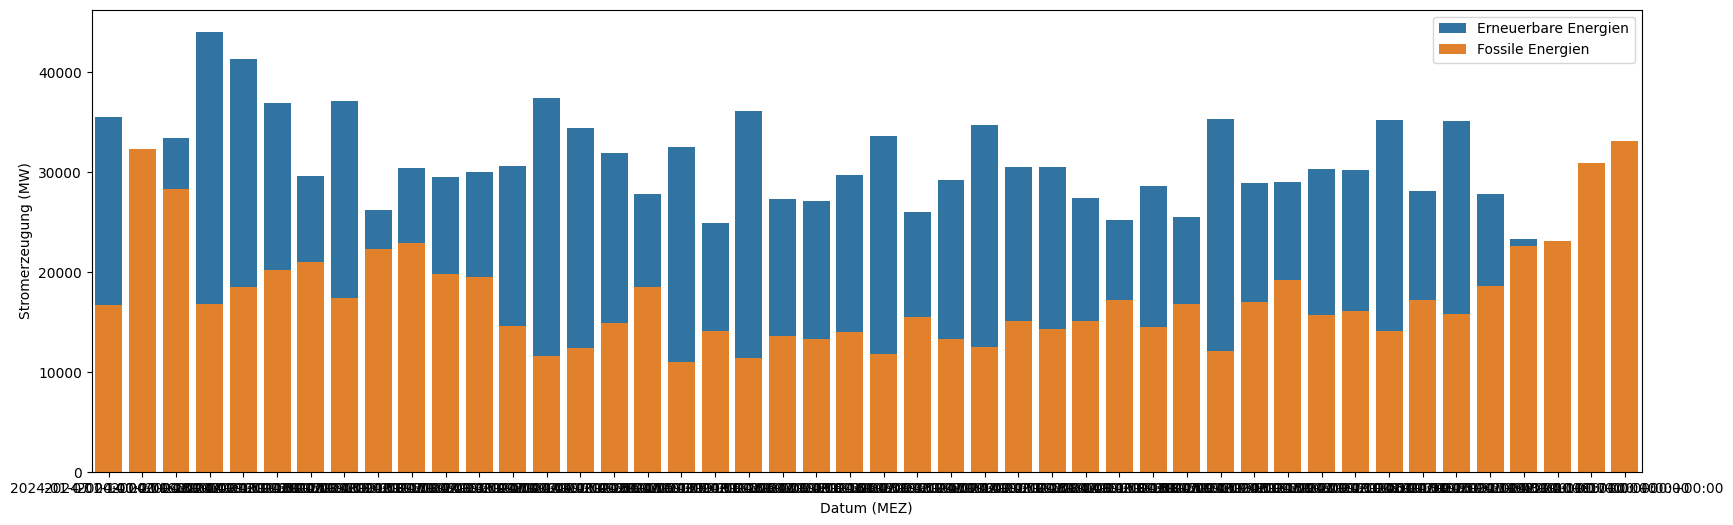

In [27]:
plt.figure(figsize=(20, 6))
plt.ylabel("Stromerzeugung (MW)")
sns.barplot(renewable_energy_df, x="Datum (MEZ)", y="energy_summed_up", label="Erneuerbare Energien")
sns.barplot(fossil_energy_df, x="Datum (MEZ)", y="energy_summed_up", label="Fossile Energien")


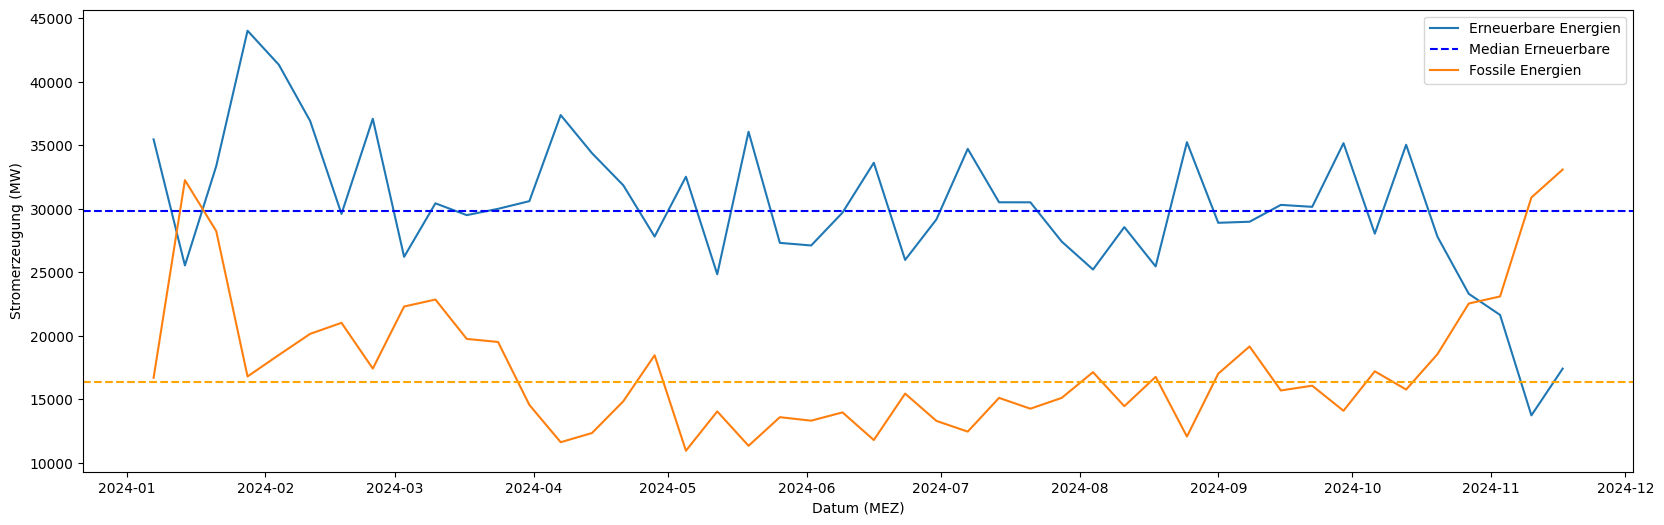

In [28]:
plt.figure(figsize=(20, 6))
plt.ylabel("Stromerzeugung (MW)")
sns.lineplot(renewable_energy_df, x="Datum (MEZ)", y="energy_summed_up", label="Erneuerbare Energien")
renewable_median = renewable_energy_df["energy_summed_up"].median()
plt.axhline(y=renewable_median, color="blue", linestyle="--", label="Median Erneuerbare")

sns.lineplot(fossil_energy_df, x="Datum (MEZ)", y="energy_summed_up", label="Fossile Energien")
fossil_median = fossil_energy_df["energy_summed_up"].median()
plt.axhline(y=fossil_median, color="orange", linestyle="--", label="Median Fossile")

In [29]:
total_renewable = sum(renewable_energy_df["energy_summed_up"])
total_fossil = sum(fossil_energy_df["energy_summed_up"])
res = total_renewable / total_fossil
print(res)

1.719946487161326


In [30]:
pie_data = pd.DataFrame({
    "Energiequelle": ["Erneuerbare Energien", "Fossile Energien"],
    "Gesamtenergie": [total_renewable, total_fossil]
})

In [31]:
fig = px.pie(
    pie_data,
    names="Energiequelle",
    values="Gesamtenergie",
    title="Anteile von Erneuerbaren und Fossilen Energien (Yearly)",
    hole=0.3,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.show()

In [32]:
yearly_df = energy_data.resample('YE').agg(['mean', 'min', 'max'])
yearly_df.columns = ['_'.join(col).strip() for col in yearly_df.columns]
yearly_df["Erneuerbare_energie"] = yearly_df[renewable_energy_list].sum(axis=1)
yearly_df["Fossile_energie"] = yearly_df[fossil_energy_list].sum(axis=1)
yearly_df

,Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,Steinkohle_mean,...,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max,Erneuerbare_energie,Fossile_energie
Datum (MEZ),,,,,,,,,,,,,,,,,,,,,
2024-12-31 00:00:00+00:00,2426.938564,1154.0,3180.3,4158.563864,3302.2,5013.7,7926.534828,2501.8,17158.3,2622.557922,...,44.2,45941.0,7774.229281,0.0,46942.0,52234.339514,31900.8,75766.7,30278.802988,17341.474107


# Die Energieerzeugung durch Müll ist die meiste Zeit konstant

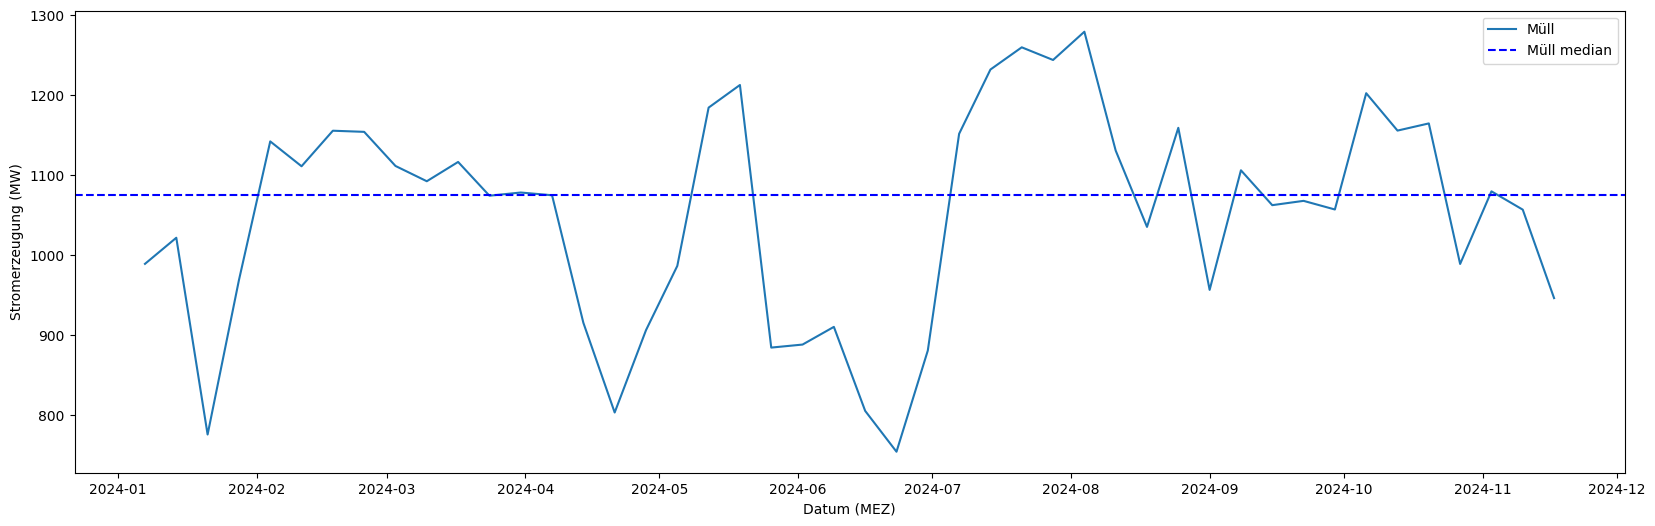

In [34]:
plt.figure(figsize=(20, 6))
plt.ylabel("Stromerzeugung (MW)")
sns.lineplot(weekly_df, x="Datum (MEZ)", y="Müll_mean", label="Müll")
müll_median = weekly_df["Müll_mean"].median()
plt.axhline(y=müll_median, color="blue", linestyle="--", label="Müll median")
plt.legend()
plt.show()

# Kohle und Gas werden vor allem dann benötigt, wenn man eine hohe Last hat

In [35]:
# DataFrame umformen (long-format)
long_df = weekly_df.reset_index().melt(
    id_vars=["Datum (MEZ)"],  # Die Spalte, die beibehalten wird
    value_vars=["Last_mean", "Erdgas_mean", "Steinkohle_mean", "Braunkohle_mean"],  # Die Spalten, die zusammengeführt werden
    var_name="Energiequelle",  # Neuer Name für die Spaltenkategorie
    value_name="Energie (MW)"  # Neuer Name für die Werte
)

long_df.head(5)
# Plot erstellen
fig = px.bar(
    long_df,
    x="Datum (MEZ)",
    y="Energie (MW)",
    color="Energiequelle",  # Gruppieren nach Energiequelle
    title="Vergleich von Gas, Kohle und Last",
    labels={"Datum (MEZ)": "Datum", "Energie (MW)": "Energie in MW"}
)

fig.show()

In [36]:
px.line(weekly_df.reset_index(),
        x="Datum (MEZ)", 
        y=["Last_mean", "Erdgas_mean", "Steinkohle_mean", "Braunkohle_mean"], 
        title="Vergleich von Gas, Kohle und Last",
        labels={"Datum (MEZ)": "Datum", "Energie (MW)": "Energie in MW"}
        )

# Hypothesen zu zeitlichen Mustern:
## Tageszeitabhängige Last:
 
Die Last zeigt ein tägliches Muster mit einem Anstieg in den Morgenstunden (zwischen 6:00 und 9:00 Uhr) und einem Rückgang am späten Abend, was den typischen Verbrauchsmuster von Haushalten und Industrie widerspiegelt.

In [37]:
hourly_index.reset_index()

,Datum (MEZ),Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,...,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max,Stunden
0,2024-01-01 00:00:00+00:00,2220.225,2216.7,2223.2,4184.150,4180.6,4187.7,3352.500,3314.0,3436.9,...,29217.925,29028.0,29440.9,2.025,1.6,2.4,40170.100,39615.0,40592.6,0
1,2024-01-01 01:00:00+00:00,2218.450,2216.1,2222.0,4157.200,4148.6,4166.3,3333.575,3322.8,3348.9,...,29335.150,29110.8,29501.6,1.875,1.7,2.4,38818.125,38328.8,39336.8,1
2,2024-01-01 02:00:00+00:00,2229.175,2223.6,2232.8,4142.925,4136.7,4153.2,3334.550,3330.2,3342.1,...,29316.350,29271.8,29388.6,1.825,1.6,2.4,37847.550,37285.7,38408.0,2
3,2024-01-01 03:00:00+00:00,2224.950,2220.8,2228.8,4120.125,4116.6,4126.4,3353.625,3342.6,3365.8,...,28860.025,28673.7,29150.7,1.975,1.6,2.4,37123.225,37031.1,37307.9,3
4,2024-01-01 04:00:00+00:00,2212.475,2210.2,2215.7,4124.925,4118.9,4133.6,3354.325,3352.2,3357.5,...,28953.975,28736.3,29213.9,1.625,1.6,1.7,36753.525,36612.8,36984.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,2024-11-14 04:00:00+00:00,1754.125,1750.3,1760.5,3945.600,3932.8,3956.5,12634.500,12582.4,12681.1,...,12794.250,12564.7,13006.8,0.000,0.0,0.0,48233.050,47482.1,49184.7,4
7637,2024-11-14 05:00:00+00:00,1736.250,1730.2,1743.1,3933.600,3928.0,3947.2,12536.150,12428.3,12593.4,...,13017.375,12967.0,13057.9,0.000,0.0,0.0,51813.075,50611.4,53521.8,5
7638,2024-11-14 06:00:00+00:00,1723.000,1720.7,1727.1,3992.650,3972.4,4011.8,12478.400,12394.1,12660.2,...,13177.500,13044.5,13258.3,0.000,0.0,0.0,59209.025,56464.8,61486.8,6
7639,2024-11-14 07:00:00+00:00,1721.775,1713.8,1728.6,4039.350,4013.3,4055.8,12838.000,12823.0,12849.0,...,12900.525,12789.0,12961.5,90.475,1.7,234.0,65201.125,63662.5,66587.0,7


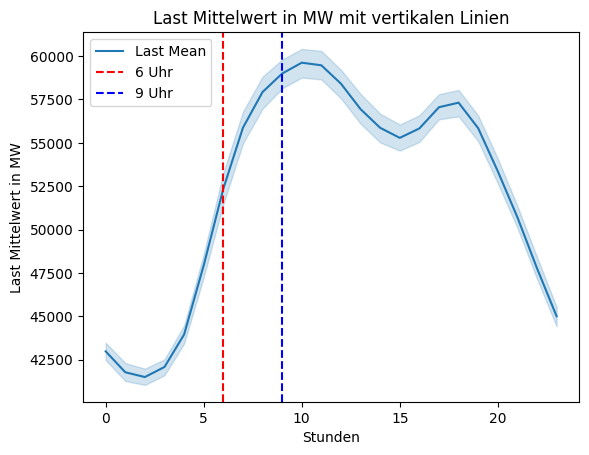

In [38]:
sns.lineplot(data=hourly_index, x="Stunden", y="Last_mean", label="Last Mean")

plt.axvline(x=6, color="red", linestyle="--", label="6 Uhr")
plt.axvline(x=9, color="blue", linestyle="--", label="9 Uhr")

plt.xlabel("Stunden")
plt.ylabel("Last Mittelwert in MW")
plt.title("Last Mittelwert in MW mit vertikalen Linien")

plt.legend()
plt.show()

## Wochenabhängige Last:
 
An Wochenenden ist die Last tendenziell niedriger als an Werktagen, da industrielle Aktivitäten zurückgehen und der Bedarf an Strom insgesamt sinkt.

In [39]:
week_depending_df = energy_data.resample("d").agg("mean").reset_index()
week_depending_df.head(4)

,Datum (MEZ),Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2024-01-01 00:00:00+00:00,2186.580208,4315.943750,3461.487500,1639.431250,398.064583,2683.115625,21.379167,75.820833,852.671875,155.563542,808.263542,4220.133333,27866.720833,1551.832292,42544.962500
1,2024-01-02 00:00:00+00:00,2125.776042,4387.323958,3890.125000,1801.418750,394.762500,4394.869792,20.813542,77.244792,1627.691667,224.348958,818.247917,4779.907292,28335.082292,431.473958,52963.648958
2,2024-01-03 00:00:00+00:00,2077.347917,4346.463542,3728.890625,1929.978125,399.762500,4226.286458,19.009375,61.034375,1076.092708,214.104167,1088.753125,4011.365625,37221.626042,1290.009375,56418.781250
3,2024-01-04 00:00:00+00:00,2088.414583,4370.854167,8065.051042,2718.870833,341.414583,6243.642708,19.985417,136.152083,1373.198958,221.423958,1109.048958,2710.664583,21571.298958,1059.695833,57579.269792


In [40]:
week_depending_df["Tag_Typ"] = week_depending_df["Datum (MEZ)"].dt.dayofweek.apply(lambda x: "Weekend" if x >= 5 else "Weekday")
week_depending_df.head(10)

,Datum (MEZ),Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Tag_Typ
0,2024-01-01 00:00:00+00:00,2186.580208,4315.943750,3461.487500,1639.431250,398.064583,2683.115625,21.379167,75.820833,852.671875,155.563542,808.263542,4220.133333,27866.720833,1551.832292,42544.962500,Weekday
1,2024-01-02 00:00:00+00:00,2125.776042,4387.323958,3890.125000,1801.418750,394.762500,4394.869792,20.813542,77.244792,1627.691667,224.348958,818.247917,4779.907292,28335.082292,431.473958,52963.648958,Weekday
2,2024-01-03 00:00:00+00:00,2077.347917,4346.463542,3728.890625,1929.978125,399.762500,4226.286458,19.009375,61.034375,1076.092708,214.104167,1088.753125,4011.365625,37221.626042,1290.009375,56418.781250,Weekday
3,2024-01-04 00:00:00+00:00,2088.414583,4370.854167,8065.051042,2718.870833,341.414583,6243.642708,19.985417,136.152083,1373.198958,221.423958,1109.048958,2710.664583,21571.298958,1059.695833,57579.269792,Weekday
4,2024-01-05 00:00:00+00:00,2197.451042,4388.927083,10670.410417,2867.222917,338.595833,6883.201042,21.429167,128.905208,840.186458,272.995833,1115.680208,5487.164583,17832.448958,1015.032292,56948.242708,Weekday
5,2024-01-06 00:00:00+00:00,2291.739583,4406.494792,11204.938542,2552.969792,327.885417,6739.990625,20.932292,104.010417,804.873958,275.445833,968.255208,5774.679167,10511.514583,535.364583,52011.383333,Weekend
6,2024-01-07 00:00:00+00:00,2374.586458,4397.511458,10501.168750,2818.841667,328.308333,6771.022917,22.325000,132.095833,631.833333,276.613542,1015.760417,4042.792708,13322.915625,672.305208,51215.313542,Weekend
7,2024-01-08 00:00:00+00:00,2327.357292,4429.826042,11654.518750,5076.863542,334.431250,9764.110417,22.023958,119.226042,948.419792,269.838542,1044.663542,4944.084375,16362.297917,1646.606250,62529.913542,Weekday
8,2024-01-09 00:00:00+00:00,2335.562500,4440.818750,13245.894792,7619.942708,463.536458,11368.627083,22.972917,250.537500,1521.100000,269.403125,978.679167,1051.887500,10306.735417,3071.238542,63989.732292,Weekday
9,2024-01-10 00:00:00+00:00,2369.128125,4500.464583,14630.246875,8353.532292,497.289583,13442.797917,21.322917,309.490625,1591.655208,274.766667,968.780208,854.962500,5500.869792,2849.487500,64078.052083,Weekday


In [41]:
res_df = week_depending_df[["Last", "Tag_Typ"]]
res_df = res_df.groupby("Tag_Typ").mean().reset_index()
res_df

,Tag_Typ,Last
0,Weekday,54887.875638
1,Weekend,45483.889537


In [42]:
px.pie(res_df, names="Tag_Typ", values="Last")

In [43]:
import plotly.express as px

# Beispiel-DataFrame
res_df = week_depending_df[["Last", "Tag_Typ"]]
res_df = res_df.groupby("Tag_Typ").mean().reset_index()

# Erstellen des Kreisdiagramms mit Anpassungen
fig = px.pie(
    res_df, 
    names="Tag_Typ", 
    values="Last", 
    title="Durchschnittliche Last pro Tagtyp",  # Hinzufügen eines Titels
    color="Tag_Typ",  # Farben basierend auf "Tag_Typ"
    color_discrete_sequence=px.colors.qualitative.Pastel  # Sanfte Farben
)

# Weitere Layout-Anpassungen
fig.update_traces(
    textinfo="percent+label",  # Prozentwerte und Labels anzeigen
    pull=[0.1 if t == "Weekend" else 0 for t in res_df["Tag_Typ"]]  # Segment "Weekend" hervorheben
)

fig.update_layout(
    title_font_size=18,  # Größerer Titel
    legend=dict(
        title="Tag Typ",  # Titel für die Legende
        orientation="h",  # Horizontale Anordnung der Legende
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=50, b=100),  # Platz oben und unten für den Titel/Legende
    template="plotly_white"  # Heller Hintergrund
)

fig.show()
